## Task 1: Background

More information about Charlson Comorbidity Index can be found [here](http://www.aqc.ch/download/HSM_Suppl_8_charlson.pdf). 

#### How many patients' data were used to create the model?

In [0]:
# 559 medical patients (607 total, but 3 missing data and only 559/604 of patients' 1-yr follow-up information was collected)

#### What time frame were the data from?

In [0]:
# during 1 month in 1984 at New York Hospital

#### How was the model validated?

In [0]:
# by using the developed comorbidity index to predict risk of death from comorbid disease in a cohort of patients (685) 
# who were treated for primary breast cancer at Yale New Haven Hospital between 1962 and 1969
# Its performance was also compared to method of classifying comorbid disease developed by Kaplan and Feinstein

#### How many patients were used to validate the model results?

In [0]:
# 685 patients

#### What were the characteristics of patients in the "Testing population"?

In [0]:
# women with histologically proven primary carcinoma of the breast, who received their first treatment at Yale New Haven
# Hospital between 1 January 1962 and 31 December 1969

___

## Task 2: Exploratory Data Analysis and SQL

##### Create a connection to the database:

In [0]:
import sqlite3 # library for working with sqlite database
import pandas as pd
conn = sqlite3.connect("./mimic_subset.db")

### General

#### List the tables

In [0]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,admission,admission,2,"CREATE TABLE ""admission"" (\n""index"" INTEGER,\n..."
1,table,diagnosis,diagnosis,1233,"CREATE TABLE ""diagnosis"" (\n""index"" INTEGER,\n..."
2,table,charlson_codes,charlson_codes,4982,"CREATE TABLE ""charlson_codes"" (\n""index"" INTEG..."
3,table,patient,patient,5087,"CREATE TABLE ""patient"" (\n""index"" INTEGER,\n ..."


In [0]:
pd.read_sql("SELECT * FROM admission LIMIT 5", conn)

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1


In [0]:
pd.read_sql("SELECT * FROM diagnosis LIMIT 5", conn)

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,0,0,1297,109,172335,1.0,40301
1,1,1,1298,109,172335,2.0,486
2,2,2,1299,109,172335,3.0,58281
3,3,3,1300,109,172335,4.0,5855
4,4,4,1301,109,172335,5.0,4254


In [0]:
pd.read_sql("SELECT * FROM charlson_codes LIMIT 5", conn)

,index,code,category
0,0,410,MI
1,1,4100,MI
2,2,41000,MI
3,3,41001,MI
4,4,41002,MI


In [0]:
pd.read_sql("SELECT * FROM patient LIMIT 5", conn)

,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,2,236,251,M,2090-03-15 00:00:00,None,None,None,0
3,3,237,252,M,2078-03-06 00:00:00,None,None,None,0
4,4,238,253,F,2089-11-26 00:00:00,None,None,None,0


### Patients:

#### Breakdown of gender for patients

In [0]:
pd.read_sql("SELECT gender,COUNT(*) AS `Breakdown` FROM patient GROUP BY gender", conn)

,GENDER,Breakdown
0,F,20399
1,M,26121


#### How many of them have a death date listed

In [0]:
pd.read_sql("SELECT COUNT(*) AS 'HasDeathDate' FROM patient WHERE DOD IS NOT NULL", conn)

,HasDeathDate
0,15759


### Admissions:

#### How many unique patients in the admissions dataset

In [0]:
pd.read_sql("SELECT COUNT(DISTINCT SUBJECT_ID) AS 'UniquePatients' FROM admission", conn)

,UniquePatients
0,17680


#### How many unique encounters in this dataset

In [0]:
pd.read_sql("SELECT COUNT(DISTINCT HADM_ID) AS 'UniqueEncounters' FROM admission", conn)

,UniqueEncounters
0,21879


#### How many encounters have an ED time listed

In [0]:
pd.read_sql("SELECT COUNT(HADM_ID) AS 'Encounters&EDTime' FROM admission WHERE (EDREGTIME IS NOT NULL OR EDOUTTIME IS NOT NULL)", conn)

,Encounters&EDTime
0,14495


#### List the primary diagnoses (Diagnosis field) in order of their prevalence

In [0]:
#review
pd.read_sql("SELECT diagnosis,COUNT(*) AS 'Diag_Prevalence' FROM admission GROUP BY diagnosis ORDER BY Diag_Prevalence DESC", conn)

,DIAGNOSIS,Diag_Prevalence
0,PNEUMONIA,969
1,SEPSIS,501
2,ALTERED MENTAL STATUS,477
3,INTRACRANIAL HEMORRHAGE,441
4,CONGESTIVE HEART FAILURE,418
5,UPPER GI BLEED,385
6,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,378
7,CHEST PAIN,353
8,ABDOMINAL PAIN,313
9,CORONARY ARTERY DISEASE,302


#### List the count of diagnoses along with the diagnosis name only for patients who died in their hospital stay in descending order

In [0]:
pd.read_sql("SELECT diagnosis,COUNT(*) AS 'Diag_Prevalence' FROM admission WHERE DEATHTIME IS NOT NULL GROUP BY diagnosis ORDER BY Diag_Prevalence DESC", conn)

,DIAGNOSIS,Diag_Prevalence
0,PNEUMONIA,150
1,INTRACRANIAL HEMORRHAGE,138
2,SEPSIS,100
3,ALTERED MENTAL STATUS,54
4,CONGESTIVE HEART FAILURE,49
5,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,44
6,CARDIAC ARREST,39
7,ABDOMINAL PAIN,38
8,HYPOTENSION,32
9,S/P FALL,32


### Charlson Codes:

#### How many categories

In [0]:
pd.read_sql("SELECT COUNT(DISTINCT category) as 'Num_Categories' FROM charlson_codes", conn)

,Num_Categories
0,17


### Diagnoses

#### Minimum, average, and maximum count of codes that is given to a patient at a particular encounter

In [0]:
pd.read_sql("""SELECT MIN(Breakdown) AS Min, AVG(Breakdown) AS Avg, MAX(Breakdown) AS Max 
            FROM (SELECT HADM_ID,COUNT(*) AS 'Breakdown' 
            FROM diagnosis 
            GROUP BY HADM_ID)
""", conn)

,Min,Avg,Max
0,1,14.632936,39


### Combined information

#### Are there patients who have death information in the patient table who do not have the same information in the admissions table?

In [0]:
#pd.read_sql("SELECT DOD FROM patient GROUP BY SUBJECT_ID", conn) # 46520 diff patients in patient table
#pd.read_sql("SELECT DEATHTIME FROM admission GROUP BY SUBJECT_ID", conn) # 17680 diff patients in admission table

pd.read_sql("""SELECT DISTINCT patient.Subject_ID, admission.DEATHTIME as 'DEATHTIME_admission', patient.DOD as 'DOD_patient' 
            FROM admission INNER JOIN patient 
            ON admission.Subject_ID = patient.Subject_ID
""", conn)

# No, the information in admission table is incomplete; there are patients who have death information in the patient table
# who do not have the same information in the admissions table, as shown below.

,SUBJECT_ID,DEATHTIME_admission,DOD_patient
0,23,None,None
1,34,None,2192-01-30 00:00:00
2,36,None,None
3,357,None,2201-08-02 00:00:00
4,85,None,2167-09-12 00:00:00
5,107,None,None
6,109,None,2142-08-30 00:00:00
7,124,2166-02-01 06:55:00,2166-02-01 00:00:00
8,154,None,None
9,109,2142-08-30 15:20:00,2142-08-30 00:00:00


#### Join the diagnosis and the Charlson tables together by code and list the Charlson Categories and their counts in descending order

In [0]:
pd.read_sql("""SELECT category,COUNT(*) AS 'Counts'
            FROM (SELECT code, category
            FROM charlson_codes INNER JOIN diagnosis 
            ON charlson_codes.code = diagnosis.ICD9_CODE)
            GROUP BY category
            ORDER BY Counts DESC
""", conn)

,category,Counts
0,CHF,11347
1,Pulmonary,6402
2,Renal,6209
3,DM,5295
4,Stroke,4041
5,MI,3457
6,LiverMild,3407
7,PVD,2918
8,Mets,2902
9,Cancer,2901


## Task 3: Visualization

#### Create a length of stay (in days) column in the dataframe. The Length of Stay is defined as the discharge time minus the admission time. 

In [0]:
df = pd.read_sql("SELECT * FROM admission", conn)
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'])
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])

df['LOS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df['LOS'].head()

0     6
1     2
2    10
3     3
4    27
Name: LOS, dtype: int64

#### Create a plot which contains boxplots that contain the length of stay information, broken down by Admission Type

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

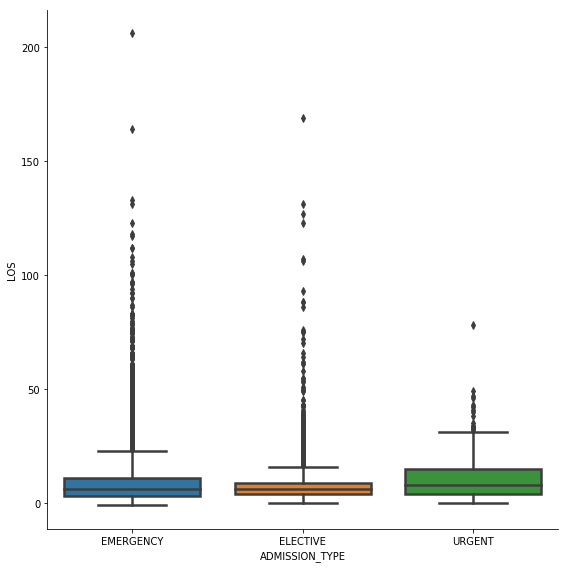

In [0]:
df1 = df[['ADMISSION_TYPE','LOS']]
plt.figure()
sns.catplot(x="ADMISSION_TYPE", y="LOS", kind="box", data=df1, linewidth=2.5, height=8)

#### Create a scatter plot which has the length of stay in days on one axis and the number of diagnosis codes for a particular encounter on the other

<Figure size 432x288 with 0 Axes>

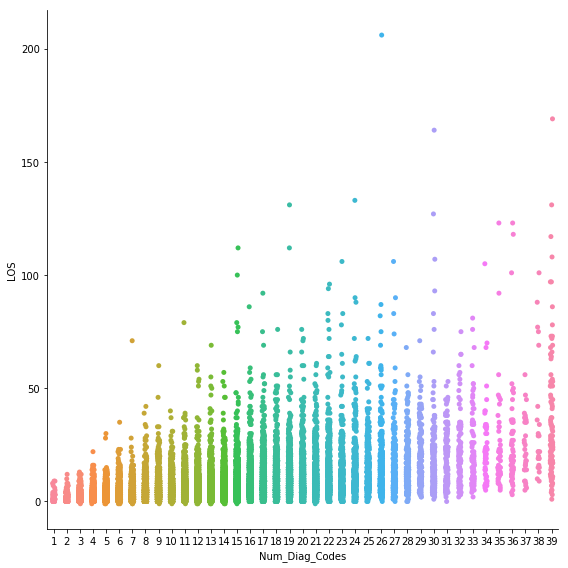

In [0]:
df2 = pd.read_sql("""SELECT * 
            FROM (SELECT DISCHTIME,ADMITTIME,HADM_ID 
            FROM admission 
            GROUP BY HADM_ID)
""", conn)
df2['DISCHTIME'] = pd.to_datetime(df2['DISCHTIME'])
df2['ADMITTIME'] = pd.to_datetime(df2['ADMITTIME'])
df2['LOS'] = (df2['DISCHTIME'] - df2['ADMITTIME']).dt.days

num_diagcodes = pd.read_sql("""SELECT * 
            FROM (SELECT HADM_ID,COUNT(*) 
            AS 'Count' 
            FROM diagnosis 
            GROUP BY HADM_ID)
""", conn) # for a particular encounter

df2['Num_Diag_Codes'] = num_diagcodes['Count']

plt.figure()
sns.catplot(x="Num_Diag_Codes", y="LOS", data=df2, height=8)

#### Q: How does marital status for a particular patient vary with length of stay?

<Figure size 432x288 with 0 Axes>

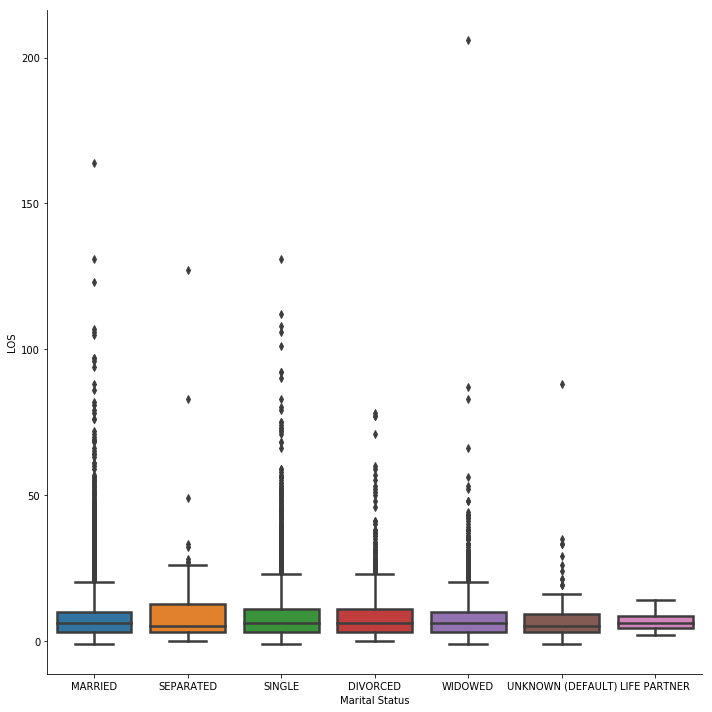

In [0]:
df3 = pd.read_sql("""SELECT * 
            FROM (SELECT DISCHTIME,ADMITTIME,Subject_ID 
            FROM admission 
            GROUP BY Subject_ID)
""", conn)
df3['DISCHTIME'] = pd.to_datetime(df3['DISCHTIME'])
df3['ADMITTIME'] = pd.to_datetime(df3['ADMITTIME'])
df3['LOS'] = (df3['DISCHTIME'] - df3['ADMITTIME']).dt.days

mar_sta = pd.read_sql("""SELECT * 
            FROM (SELECT Subject_ID,MARITAL_STATUS 
            FROM admission 
            GROUP BY Subject_ID)
""", conn) # for a particular patient

df3['Marital Status'] = mar_sta['MARITAL_STATUS']

plt.figure()
g = sns.catplot(x="Marital Status", y="LOS", kind="box", data=df3, linewidth=2.5, height=10)
## Visualizing the box plot below, there does not seem to be a huge correlation or distinction in LOS with varying marital
## status. However, compared to the rest, the 'Separated' patients may have a slightly higher LOS, though further statistical
## testing would be needed to accurately make this claim.

## Task 4: Create the Design/Model matrix 

Create a Design/Model matrix for the clinical risk score. Each row should pertain to a unique encounter, and the columns should be each of the categories available in the `charlson_codes` table. 

Detect the presence of an ICD-code that belongs to a category in the Charlson Comorbidity Index and make the corresponding entry a 1 if it is present, and a 0 if it is not. 

Create a column that contains the value 1.0 to represent the intercept weight.

Create a column that represents whether a patient's death date is within 1 year of their encounter `ADMITTIME`.


##### As a DataFrame

In [0]:
example_df = pd.DataFrame({'Intercept': [1,1,1], 'CHF': [1, 0, 0], 'MI': [1, 1, 0], 'Stroke': [0, 0, 0], '1_yr_mortality': [1, 0, 0]})
example_df

,Intercept,CHF,MI,Stroke,1_yr_mortality
0,1,1,1,0,1
1,1,0,1,0,0
2,1,0,0,0,0


##### As a Numpy array

In [0]:
example_df.values

array([[1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

### Steps for Creating the Design Matrix

Use the `admission`, `diagnosis`, `charlson_codes`, and `patient` tables 

In [0]:
import numpy as np

In [0]:
pat_adm = pd.read_sql("""SELECT * 
            FROM admission INNER JOIN patient 
            ON admission.Subject_ID = patient.Subject_ID
""", conn)

pat_adm['DOD'] = pd.to_datetime(pat_adm['DOD'])
pat_adm['ADMITTIME'] = pd.to_datetime(pat_adm['ADMITTIME'])
pat_adm['days_to_death'] = (pat_adm['DOD'] - pat_adm['ADMITTIME']).dt.days
pat_adm['1_yr_mortality'] = pat_adm['days_to_death']<=365
pat_adm['1_yr_mortality'] = pat_adm['1_yr_mortality'].astype(int)
pat_adm = pat_adm[['HADM_ID','DOD','ADMITTIME','days_to_death','1_yr_mortality']]
pat_adm.head()

,HADM_ID,DOD,ADMITTIME,days_to_death,1_yr_mortality
0,124321,NaT,2157-10-18 19:34:00,NaN,0
1,144319,2192-01-30,2191-02-23 05:23:00,340.0,1
2,165660,NaT,2134-05-10 11:30:00,NaN,0
3,101651,2201-08-02,2199-10-20 12:05:00,650.0,0
4,117876,2201-08-02,2199-12-21 22:37:00,588.0,0


Join the `diagnosis` and `charlson_codes` data together

In [0]:
diag_charl = pd.read_sql("""SELECT * 
            FROM diagnosis INNER JOIN charlson_codes 
            ON diagnosis.ICD9_Code = charlson_codes.code
""", conn)
diag_charl.head()

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,index,code,category
0,0,0,1297,109,172335,1.0,40301,4762,40301,Renal
1,2,2,1299,109,172335,3.0,58281,4862,58281,Renal
2,3,3,1300,109,172335,4.0,5855,5004,5855,Renal
3,4,4,1301,109,172335,5.0,4254,232,4254,CHF
4,6,6,1303,109,172335,7.0,7100,3372,7100,Rheumatic


Convert DataFrame's long format to wide format so that each category is represented as its own column

In [0]:
wide_diag_charl = diag_charl.groupby(['HADM_ID', 'category']).size().unstack()
wide_diag_charl.head()
# 21879 unique encounters

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
100010,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100018,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0


Binarize each of the category columns

In [0]:
col_names = wide_diag_charl.columns
for col in col_names:
    wide_diag_charl[col] = (wide_diag_charl[col] > 0).astype(int)
wide_diag_charl.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100003,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
100009,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
100010,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
100018,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1


Merge all of the data together

In [0]:
model_dataset = (wide_diag_charl.merge(pat_adm[['1_yr_mortality','HADM_ID']], how = "left", on = "HADM_ID")
                )
model_dataset.insert(0, "Intercept", 1) 
model_dataset = model_dataset.drop('HADM_ID', 1)
model_dataset

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,1_yr_mortality
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
5,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1


# Task 5: Fit a logistic regression model via gradient ascent

The Gradient Ascent update equation is given by: 
$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

Pseudocode:
```    
Repeat {

  1. Calculate average gradient value over the dataset(for all x_j)
  2. Multiply by the average gradient by the learning rate
  3. Update the weights by adding this value to the original weights

}
```

```
from statsmodels import api as sm

logit = sm.Logit(y, X)
logit.fit().params
```

In [0]:
import numpy as np

# convert design matrix into numpy array
temp = model_dataset.values
# set training input
x_train = temp[:,0:18]
# set training labels
y_train = []
for i in temp[:,18]:
    y_train.append([i]) # puts y_train into array format needed
# initialize weights
weights = np.zeros((x_train.shape[1],1))

In [0]:
def sigmoid(z):
    #activation function for logistic regression
    return 1 / (1 + np.exp(-z))

def predict_val(x_train, weights):
    z = np.dot(x_train, weights)
    return sigmoid(z)

def gradi(x_train, prediction, y_train):
    return np.dot(x_train.T,  y_train - prediction)

## USING GRADIENT ASCENT
def update_weights(x_train, y_train, weights, alpha):
    #weights = initialized set of weights
    #alpha = learning rate
    #features = training data (category - 1's and 0's)
    #labels = training label (1_yr_mortality)
    
    predictions = predict_val(x_train, weights)

    # sum of gradients over entire dataset
    gradient = gradi(x_train, predictions, y_train)

    #1 Calculate average gradient value over the dataset(for all x_j)
    gradient /= len(x_train)

    #2 - Multiply the average gradient by the learning rate
    gradient *= alpha

    #3 - Update the weights by adding this value to the original weights
    weights += gradient

    # return new weights
    return weights

# iteratively train
def train(x_train, y_train, weights, alpha, num_iter):
    for i in range(num_iter):
        weights = update_weights(x_train, y_train, weights, alpha)
    return weights

In [0]:
alpha = 0.05
num_iter = 40000
train(x_train, y_train, weights, alpha, num_iter)
weights

array([[-1.79678743],
       [ 0.64500633],
       [ 0.99381686],
       [-0.07447483],
       [-0.27683255],
       [ 1.03638751],
       [-0.03905798],
       [ 0.37499179],
       [ 0.88315416],
       [ 0.00970793],
       [ 1.78529192],
       [-0.03873222],
       [ 0.10273568],
       [ 0.36272364],
       [ 0.12805615],
       [ 0.59365153],
       [ 0.15300689],
       [ 0.4753251 ]])

In [0]:
#check against statsmodel weights
from statsmodels import api as sm

logit = sm.Logit(y_train, x_train)
logit.fit().params

## PRETTY CLOSE!

Optimization terminated successfully.
         Current function value: 0.552290
         Iterations 5


array([-1.79681149,  0.64501572,  0.99381556, -0.07446433, -0.27682168,
        1.03639994, -0.03785321,  0.37496309,  0.88318575,  0.00971758,
        1.78530929, -0.0387222 ,  0.1027442 ,  0.36273724,  0.12806205,
        0.59364506,  0.15301175,  0.47533345])